In [3]:
#Project 1 --- HR_Analytics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [10]:
hr=pd.read_excel('C://Users//Admin//Desktop//laptop//pyWork//pyData//HR_Processed_data.xlsx')

In [11]:
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
hr.shape

(14999, 10)

In [14]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [15]:
hr.index

RangeIndex(start=0, stop=14999, step=1)

In [16]:
hr.head(5).append(hr.tail(3))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [17]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
hr.describe(percentiles=[0.25,0.5,0.75,1]).round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
100%,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [20]:
#2. Data Cleaning and Preparation
hr=hr.rename(columns={'average_montly_hours':'average_monthly_hours'}) #renaming incorrect values

In [21]:
hr.columns=hr.columns.str.lower() #changing the case to lower-case

In [22]:
#checking for duplicate values
hr.loc[hr.duplicated()] #checking duplicate values
hr.drop_duplicates(keep=False, inplace=True) #deleting duplicate values

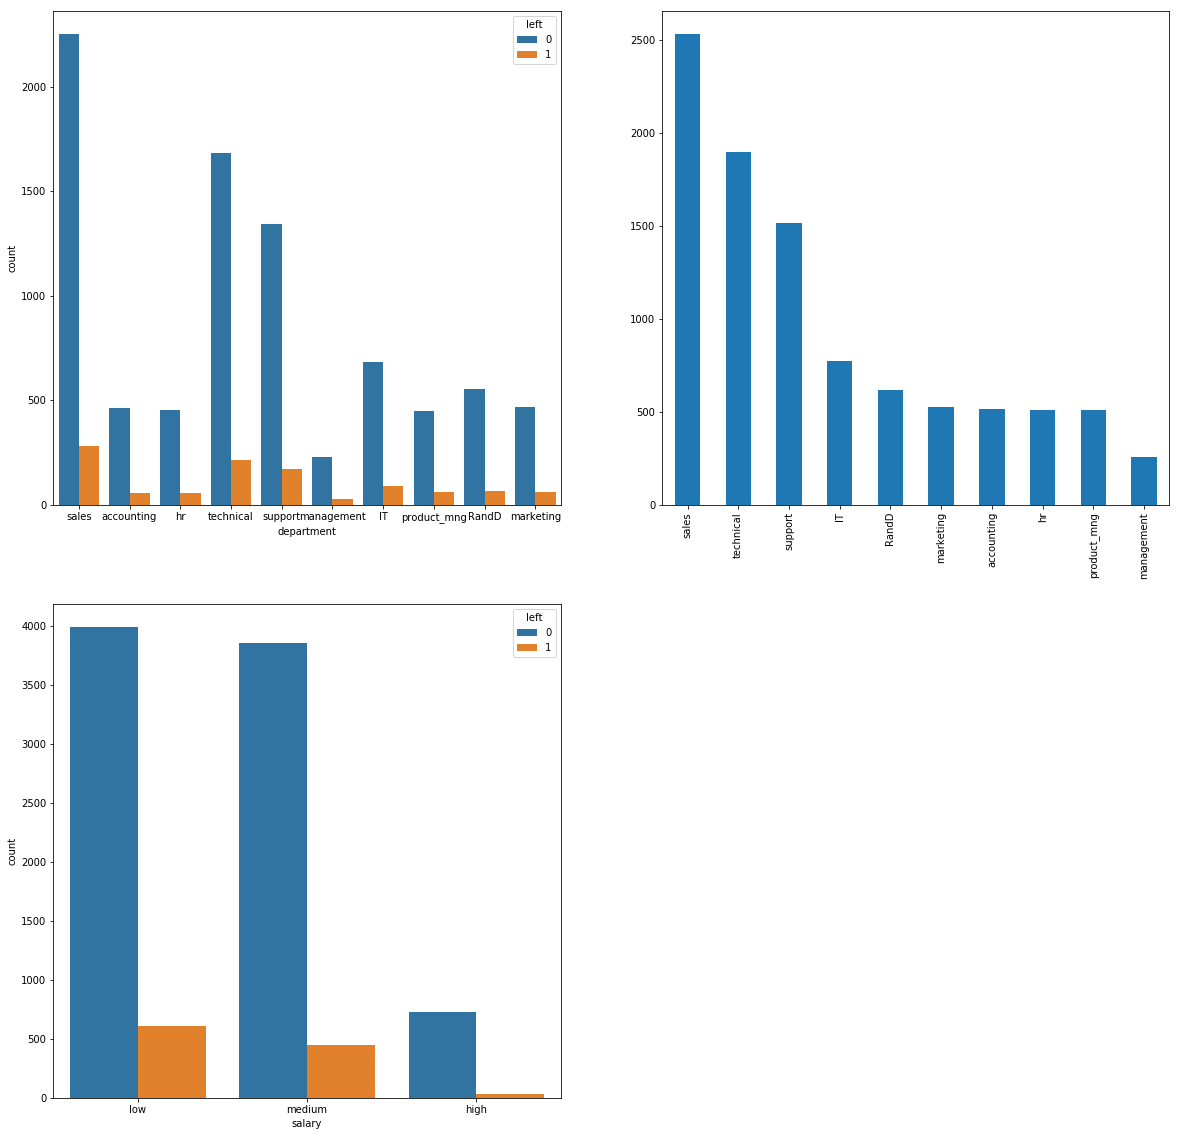

In [23]:
#3. Visualizing the Data

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
hr.groupby(['department'])['left'].value_counts() #checking how many from each department left and didn't leave
sns.countplot(x = 'department', hue = 'left', data = hr)
plt.subplot(2,2,2)
hr['department'].value_counts().plot('bar') #people in each department
plt.subplot(2,2,3)
sns.countplot(x = 'salary', hue='left', data = hr) #salary of people leaving and not leaving

In [24]:
hr_data=hr.copy()
hr_data['salary'] = hr_data['salary'].astype('category')
hr_data['salary'] = hr_data['salary'].cat.reorder_categories(['low', 'medium', 'high'])
hr_data['salary'] = hr_data['salary'].cat.codes

In [25]:
#combining support, technical and IT into one value - technical
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department']) 
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [26]:
hr['department'].unique() #checking the unique values

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'RandD', 'marketing'], dtype=object)

In [27]:
#exploring categorical columns
hr.groupby('left').mean()
hr.groupby('department').mean()
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.648758,0.708375,3.815059,199.906209,3.167768,0.158520,0.036988,0.021136
low,0.640490,0.720342,3.805616,200.127558,3.183283,0.164345,0.131911,0.003047
medium,0.644007,0.715602,3.798001,199.866109,3.207345,0.158996,0.103905,0.014412


Text(0, 0.5, 'Frequency of Turnover')

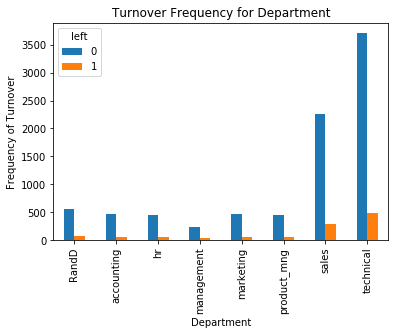

In [28]:
#plot - employee turnover of the company
pd.crosstab(hr['department'],hr['left']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

In [29]:
#. numerical data

"""
Categorical Variables
- Salary
- Department
- Number of Projects
- Left
- Promotion last 5 years
- Work Accident
- Time Spent in Company
"""

'\nCategorical Variables\n- Salary\n- Department\n- Number of Projects\n- Left\n- Promotion last 5 years\n- Work Accident\n- Time Spent in Company\n'

In [30]:
#Dummy Variables
def dummies(x,df):
    var=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df,var], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

In [31]:
hr=dummies('department',hr)
hr=dummies('salary',hr)
hr=dummies('number_project',hr)
hr=dummies('promotion_last_5years',hr)
hr=dummies('work_accident',hr)
hr=dummies('time_spend_company',hr)

In [32]:
#creating the target and independent variable
hr_var=hr.columns.tolist()
y=['left']
x=[var for var in hr_var if var not in y]

In [33]:
#Starting Regression

from sklearn.feature_selection import RFE #Recursive Feature Selection for Selecting Features
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()
rfe = RFE(model, 15)
rfe = rfe.fit(hr[x], hr[y])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will b

In [36]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False False False False False
  True False  True  True False  True False  True  True False  True False
 False  True  True  True False  True  True  True False]
[ 1  1 18 15 14 13 17 12 19 16  6  7  1  5  1  1  2  1  8  1  1 11  1  9
 10  1  1  1  4  1  1  1  3]


In [37]:
list(zip(hr[x].columns,rfe.support_,rfe.ranking_))

[('satisfaction_level', True, 1),
 ('last_evaluation', True, 1),
 ('average_monthly_hours', False, 18),
 ('accounting', False, 15),
 ('hr', False, 14),
 ('management', False, 13),
 ('marketing', False, 17),
 ('product_mng', False, 12),
 ('sales', False, 19),
 ('technical', False, 16),
 ('low', False, 6),
 ('medium', False, 7),
 (3, True, 1),
 (3, False, 5),
 (4, True, 1),
 (4, True, 1),
 (5, False, 2),
 (5, True, 1),
 (6, False, 8),
 (6, True, 1),
 (7, True, 1),
 (1, False, 11),
 (1, True, 1),
 (1, False, 9),
 (1, False, 10),
 (3, True, 1),
 (3, True, 1),
 (4, True, 1),
 (4, False, 4),
 (5, True, 1),
 (5, True, 1),
 (6, True, 1),
 (6, False, 3)]

In [38]:
num_vars=hr[x].columns[rfe.support_] #selected features

In [39]:
x=hr[num_vars]
y=hr['left']

In [40]:
#creating regression model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_pred=logreg.predict(x_test)
from sklearn.metrics import accuracy_score

In [42]:
print('Logistic regression accuracy: ',(accuracy_score(y_test,y_pred )*100).round(3),'%') #accuracy score of the model

Logistic regression accuracy:  91.248 %


In [43]:
y_pred=pd.DataFrame(y_pred)

In [44]:
y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index(drop=True)

In [45]:
p=pd.concat([y_test, y_pred], axis=1)
p=p.rename(columns={0:'pred_left'})

In [46]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rf_pred=pd.DataFrame(rf.predict(x_test))
acc=accuracy_score(y_test,rf_pred)*100

In [48]:
print('Random Forest accuracy: ',acc.round(3),'%') #accuracy score of the model

Random Forest accuracy:  98.239 %


In [49]:
rf_pred[0].value_counts()
rf_pred.index

RangeIndex(start=0, stop=1931, step=1)

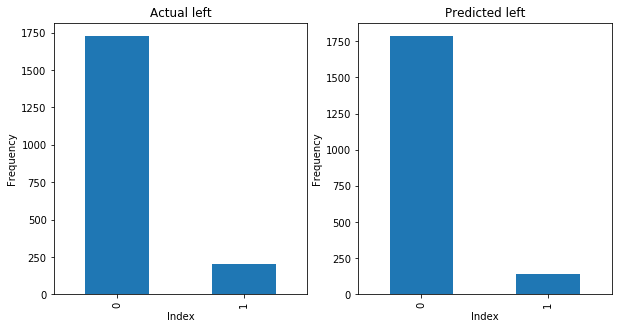

In [50]:
#changing to dataframe for plotting

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Actual left')
plt.xlabel('Index')
plt.ylabel('Frequency')
p['left'].value_counts().plot('bar')
plt.subplot(1,2,2)
plt.title('Predicted left')
plt.xlabel('Index')
plt.ylabel('Frequency')
p['pred_left'].value_counts().plot('bar')
plt.show()

In [51]:
#validation techniques - confusion matrix for logistic regression

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1675,   55],
       [ 114,   87]], dtype=int64)

In [52]:
cm_rf=confusion_matrix(y_test,rf_pred)
cm_rf

array([[1717,   13],
       [  21,  180]], dtype=int64)

In [53]:
#validation techniques - K-fold for random forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(n_splits=15, random_state=100)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_test, y_test, cv=kfold, scoring=scoring)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

In [54]:
print("15-fold cross validation average accuracy: ",((results.mean())*100).round(3),'%')

15-fold cross validation average accuracy:  97.515 %


In [55]:
#classification report to check generalisation of data
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred)) #random forest report
print(classification_report(y_test, y_pred)) #logistic regression report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1730
           1       0.93      0.90      0.91       201

   micro avg       0.98      0.98      0.98      1931
   macro avg       0.96      0.94      0.95      1931
weighted avg       0.98      0.98      0.98      1931

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1730
           1       0.61      0.43      0.51       201

   micro avg       0.91      0.91      0.91      1931
   macro avg       0.77      0.70      0.73      1931
weighted avg       0.90      0.91      0.91      1931



In [56]:
a=rf.predict_proba(x_test) #predicted probability
a=pd.DataFrame(a)

In [57]:
a.loc[:,0] #probability for 0 - didn't leave 
a.loc[:,1] #probability for 1 - left

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.9
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1901    1.0
1902    0.0
1903    0.0
1904    0.0
1905    0.0
1906    0.0
1907    0.0
1908    0.6
1909    0.0
1910    0.0
1911    1.0
1912    0.0
1913    0.0
1914    0.0
1915    0.0
1916    0.0
1917    0.0
1918    0.0
1919    1.0
1920    0.0
1921    0.0
1922    0.0
1923    0.0
1924    1.0
1925    0.0
1926    0.0
1927    0.0
1928    0.0
1929    0.0
1930    0.0
Name: 1, Length: 1931, dtype: float64

In [58]:
#roc curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,y_pred)
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,rf_pred)

In [59]:
roc_auc=roc_auc_score(y_test,y_pred)
roc_auc_rf=roc_auc_score(y_test,rf_pred)

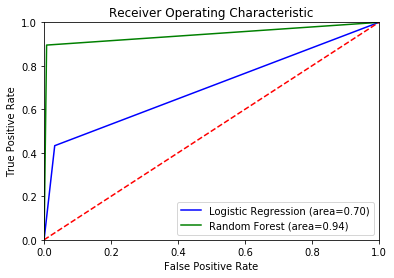

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='Logistic Regression (area=%0.2f)'%roc_auc)
plt.plot(fpr_rf,tpr_rf,'g',label='Random Forest (area=%0.2f)'%roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#End of FirstFinal Project :